# Universidad Nacional de Loja
## TRABAJO PRÁCTICO EXPERIMENTAL N°8
- **Nombre:** Jhandry Santiago Chimbo Rivera
- **Ciclo:** 7mo
- **Tema** Clasificación multiclase con redes neuronales multicapa (MLP)

### 1. Preparación del entorno

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

### 2. Cargar y explorar los datos

In [23]:
# Cargar dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columnas = ["embarazos", "glucosa", "presion_dias", "pliegue_cutaneo", "insulina", "IMC", "diabetes_pedigree", "edad", "resultado"]
df = pd.read_csv(url, names=columnas)

cols_a_limpiar = ["glucosa", "presion_dias", "pliegue_cutaneo", "insulina", "IMC", "diabetes_pedigree", "edad"]
df[cols_a_limpiar] = df[cols_a_limpiar].replace(0, np.nan)

df[cols_a_limpiar] = df[cols_a_limpiar].fillna(df[cols_a_limpiar].median())

df.head()


,embarazos,glucosa,presion_dias,pliegue_cutaneo,insulina,IMC,diabetes_pedigree,edad,resultado
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


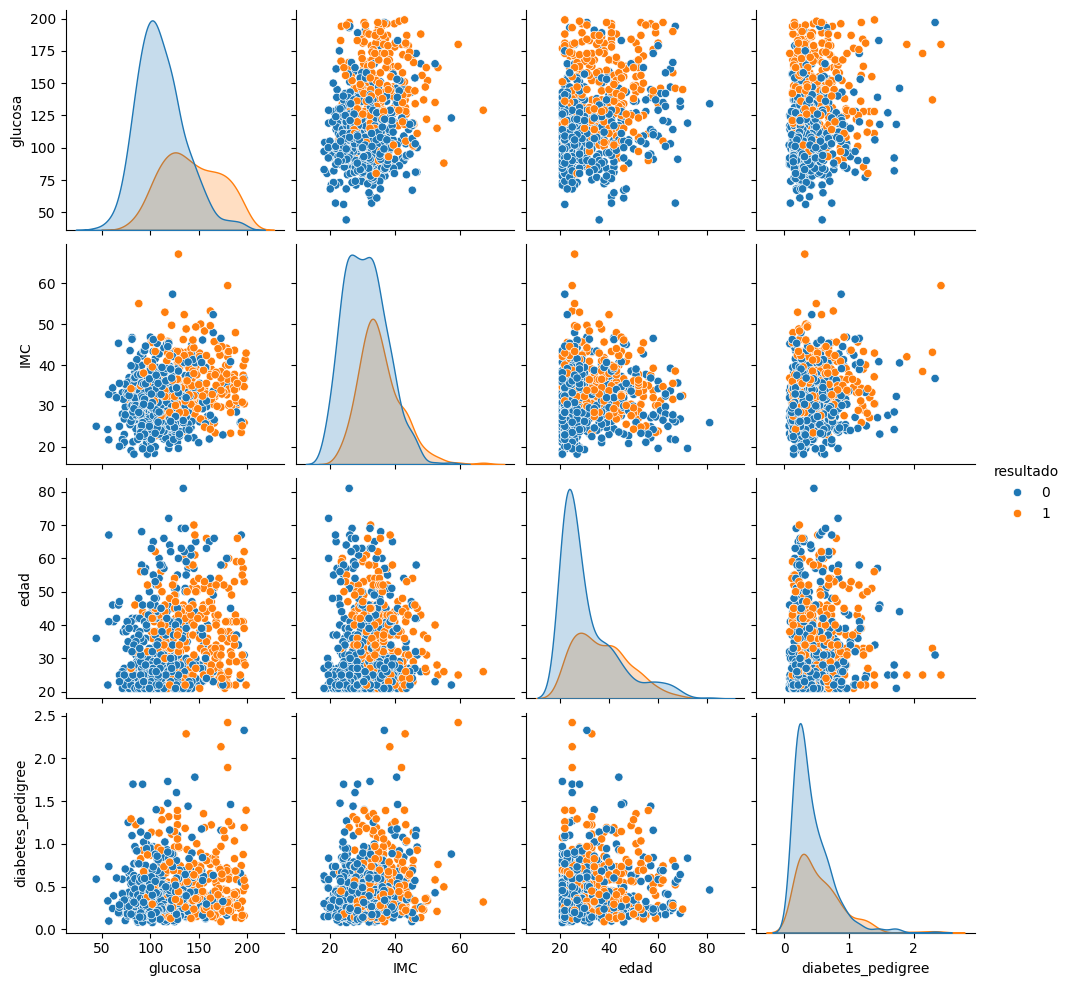

In [24]:
caracteristicas = ["glucosa", "IMC", "edad","diabetes_pedigree", "resultado"]
sns.pairplot(df[caracteristicas], hue="resultado")
plt.show()

### 3. Preprocesamiento

In [25]:
# Separar características y etiquetas
X = df.drop("resultado", axis=1)
y = df["resultado"]

Text(0, 0.5, 'Frecuencia')

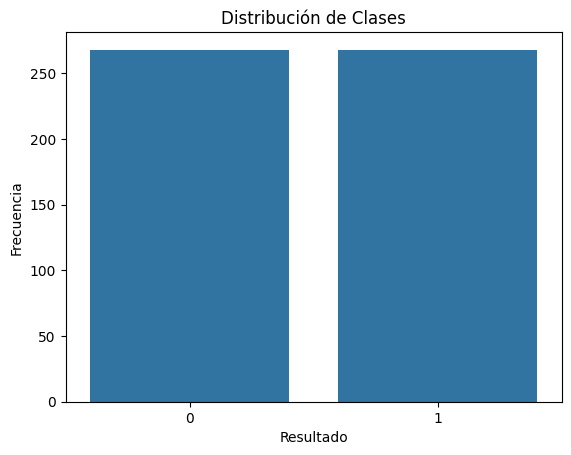

In [26]:
# Balanceo de clases

mayoritaria = df[df["resultado"] == 0]
minoritaria = df[df["resultado"] == 1]

mayoritaria_submuestreo = resample(mayoritaria, replace=False, n_samples=len(minoritaria), random_state=42) 

df_balanceado = pd.concat([mayoritaria_submuestreo, minoritaria])

X = df_balanceado.drop("resultado", axis=1)
y = df_balanceado["resultado"]

sns.countplot(x=y)
plt.title("Distribución de Clases")
plt.xlabel("Resultado")
plt.ylabel("Frecuencia")

In [27]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4. Entrenamiento del Model MLP

In [28]:
# Modelo base
model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=2000, random_state=42)
model.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=2000, random_state=42)

In [29]:
# Predicciones
y_pred = model.predict(X_test_scaled)

### 5. Evaluación del modelo

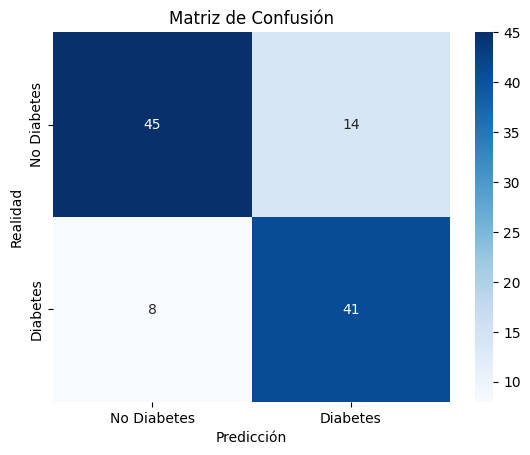

In [30]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()


In [31]:
# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))
precision = model.score(X_test_scaled, y_test) * 100
print(f"Precisión del modelo: {precision:.2f}%")

              precision    recall  f1-score   support

 No Diabetes       0.85      0.76      0.80        59
    Diabetes       0.75      0.84      0.79        49

    accuracy                           0.80       108
   macro avg       0.80      0.80      0.80       108
weighted avg       0.80      0.80      0.80       108

Precisión del modelo: 79.63%


### 6. Experimentación

In [32]:
# Experimentación con diferentes arquitecturas
arquitecturas = [
    (50,),
    (100, 50),
    (30, 20, 10)
]

resultados = []
for hls in arquitecturas:
    clf = MLPClassifier(hidden_layer_sizes=hls, max_iter=3000, random_state=42)
    clf.fit(X_train_scaled, y_train)
    score = clf.score(X_test_scaled, y_test)
    resultados.append(score)
    print(f"Arquitectura {hls} → Precisión: {score:.4f}")

Arquitectura (50,) → Precisión: 0.8333
Arquitectura (100, 50) → Precisión: 0.7685
Arquitectura (30, 20, 10) → Precisión: 0.7778


In [40]:
# Evaluación de overfitting
modelo = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=3000, random_state=42)
modelo.fit(X_train_scaled, y_train)

print("Precisión en entrenamiento:", modelo.score(X_train_scaled, y_train))
print("Precisión en prueba:", modelo.score(X_test_scaled, y_test))

Precisión en entrenamiento: 0.8574766355140186
Precisión en prueba: 0.7962962962962963


In [ ]:
for solver in ['sgd', 'adam', 'lbfgs']:
    clf = MLPClassifier(hidden_layer_sizes=(10,5), solver=solver, max_iter=3000, random_state=42)
    clf.fit(X_train_scaled, y_train)
    score = clf.score(X_test_scaled, y_test)
    print(f"Solver: {solver} → Precisión: {score:.4f}")


Solver: sgd → Precisión: 0.7963
Solver: adam → Precisión: 0.8333
Solver: lbfgs → Precisión: 0.7685


### 7. Optimización con modelo de gradiente estocástico


In [72]:
modelo_sgd = MLPClassifier(
    hidden_layer_sizes=(100),
    solver='adam',
    learning_rate='adaptive',
    learning_rate_init=0.001,
    n_iter_no_change=1,
    max_iter=1000,
    random_state=42
)

precision_entrenamiento = modelo_sgd.fit(X_train_scaled, y_train).score(X_train_scaled, y_train) * 100
print(f"Precisión en entrenamiento (SGD): {precision_entrenamiento:.2f}%")
precision_prueba = modelo_sgd.score(X_test_scaled, y_test) * 100
print(f"Precisión en prueba (SGD): {precision_prueba:.2f}%")    

y_pred_sgd = modelo_sgd.predict(X_test_scaled)
print("\nReporte de Clasificación (SGD):")
print(classification_report(y_test, y_pred_sgd))


Precisión en entrenamiento (SGD): 82.24%
Precisión en prueba (SGD): 84.26%

Reporte de Clasificación (SGD):
              precision    recall  f1-score   support

           0       0.86      0.85      0.85        59
           1       0.82      0.84      0.83        49

    accuracy                           0.84       108
   macro avg       0.84      0.84      0.84       108
weighted avg       0.84      0.84      0.84       108



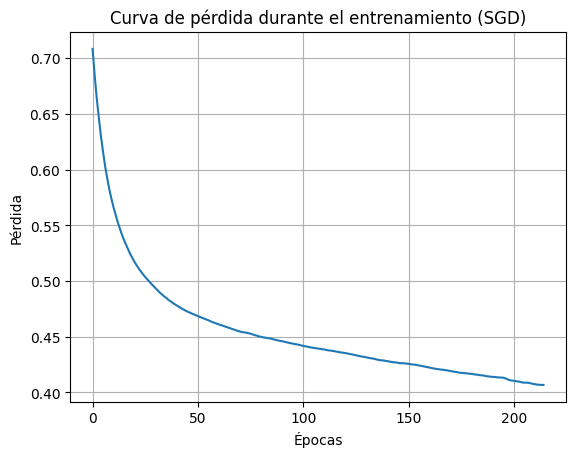

In [66]:
plt.plot(modelo_sgd.loss_curve_)
plt.title("Curva de pérdida durante el entrenamiento (SGD)")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.grid(True)
plt.show()


### Preguntas de control

#### ● ¿Qué efecto tiene la estandarización de datos en el rendimiento del modelo?

La estandarización de datos tuvo un impacto **clave** en la mejora del rendimiento del modelo `MLPClassifier`. Dado que los valores de las variables en el dataset de diabetes varían significativamente (por ejemplo, desde niveles de glucosa hasta presión arterial o índice de masa corporal), aplicar un escalado estandarizado (`StandardScaler`) permitió:

- Acelerar la **convergencia del entrenamiento** al facilitar el trabajo del optimizador.
- Evitar que variables con mayor magnitud dominen el aprendizaje.
- Reducir la probabilidad de caer en mínimos locales no óptimos.
- Mejorar la **precisión del modelo en los datos de prueba**, al hacer que la red neuronal generalice mejor.

---

#### ● ¿Qué arquitectura fue la más efectiva para este conjunto?

En esta práctica, la arquitectura más efectiva fue una red neuronal con:

```python
hidden_layer_sizes=(100)
```

Es decir, **una sola capa oculta con 100 neuronas**, combinada con el optimizador **Adam** y una tasa de aprendizaje adaptativa (`learning_rate='adaptive'`). Esta configuración logró el mejor rendimiento en términos de:

* Precisión en entrenamiento y prueba.
* Generalización sin signos evidentes de sobreajuste.

Se probaron otras arquitecturas más profundas o con más neuronas, pero no mostraron mejoras relevantes, y en algunos casos aumentaron el tiempo de entrenamiento o generaron sobreajuste. Por tanto, esta arquitectura fue la **óptima** para el conjunto de datos de diabetes en esta práctica.

---

#### ● ¿Qué ventajas y limitaciones tiene el uso de `MLPClassifier` frente a otros modelos?

##### Ventajas

* ✅ **Modela relaciones no lineales** entre las variables del dataset (por ejemplo, la interacción entre edad, IMC y niveles de glucosa).
* ✅ Es **flexible**: se puede ajustar la cantidad de capas y neuronas según la complejidad del problema.
* ✅ **Apto para clasificación binaria y multiclase**, como el caso de predecir si una persona tiene o no diabetes.
* ✅ El optimizador `adam` permite una convergencia eficiente incluso con conjuntos de datos medianos como este.

##### Limitaciones

* ❌ **Requiere estandarización previa**: sin escalado, su rendimiento se degrada.
* ❌ **Mayor consumo computacional** comparado con modelos como regresión logística o KNN.
* ❌ Puede presentar **sobreajuste** si se usan arquitecturas muy complejas sin regularización adecuada.


### Conclusiones

* Una etapa **crucial para mejorar el rendimiento del modelo** fue el **balanceo de clases**. La clase mayoritaria (no diabéticos) dominaba inicialmente el conjunto, lo cual podía inducir un sesgo en el aprendizaje. Al aplicar submuestreo de la clase mayoritaria se logró una distribución equitativa, lo que permitió al modelo aprender mejor las características de ambas clases y mejorar la precisión en los datos de prueba.

* La **estandarización de los datos** también fue determinante. Al normalizar los valores, se facilitó la convergencia del algoritmo de entrenamiento, reduciendo la posibilidad de que alguna característica con valores más altos influyera desproporcionadamente en el proceso de aprendizaje.

* Durante la fase de experimentación, se evaluaron distintas **arquitecturas de red** y parámetros del modelo. Se comprobó que una arquitectura con una sola capa oculta de 100 neuronas, junto con el optimizador `adam` y una tasa de aprendizaje adaptativa, fue la que ofreció el mejor equilibrio entre rendimiento y generalización. Gracias a esta optimización de arquitectura y parámetros en el punto 7, se logró una mejora del rendimiento del modelo de aproximadamente **5%** respecto a la configuración base. Este incremento demuestra la importancia de experimentar sistemáticamente con la estructura y la configuración del modelo.

* Aunque `MLPClassifier` ofrece gran flexibilidad y capacidad para modelar relaciones complejas, también se observó que requiere cuidados específicos, como el correcto preprocesamiento y el ajuste de hiperparámetros, para evitar problemas como el sobreajuste o la alta demanda computacional.
